<a href="https://colab.research.google.com/github/kundan2403/ml-algo/blob/main/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear regression

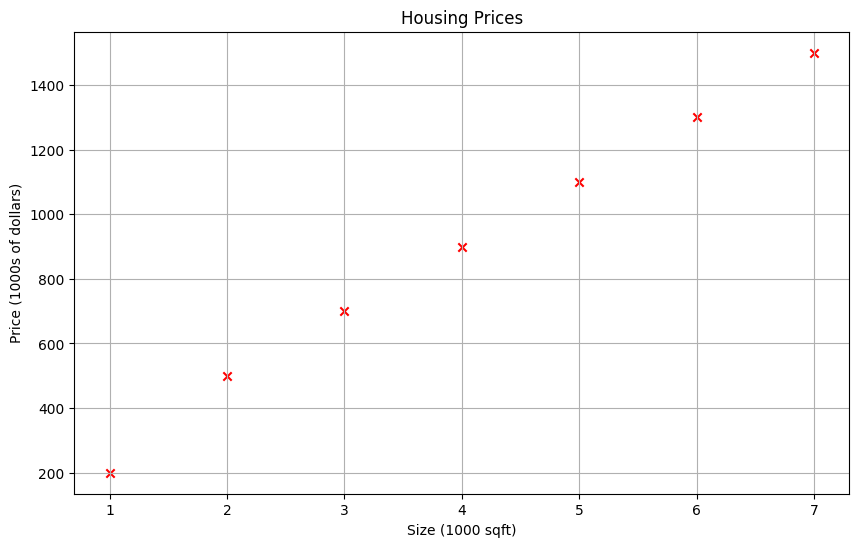

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Training data: size of houses (in square feet) and their corresponding prices (in 100 $)
x_train = np.array([1, 2, 3, 4, 5, 6, 7], dtype='float')
y_train = np.array([200, 500, 700, 900, 1100, 1300, 1500], dtype='float')

# Normalize data to prevent overflow
x_mean = np.mean(x_train)
x_std = np.std(x_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

x_train_normalized = (x_train - x_mean) / x_std
y_train_normalized = (y_train - y_mean) / y_std

# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, marker='x', color='red')
plt.title("Housing Prices")
plt.xlabel('Size (1000 sqft)')
plt.ylabel('Price (1000s of dollars)')
plt.grid(True)
plt.show()


In [86]:
#Pridict new cost
def predict(w, b, x):
  pridcits = []
  for i in range(len(x)):
    f_wb = w * x[i] + b
    pridcits.append(f_wb)
  return pridcits

#calculating cost on different value of w and b
def calculate_cost(w, b, x, y):
  m = x.shape[0]
  cost = 0.0
  for i in range(m):
    f_wb = w * x[i] + b
    cost += (f_wb - y[i]) ** 2
  return cost / (2 * m)

Cost for w = 0.1, b = 0.0: [20.0, 30.0, 40.0, 50.0, 60.0] - 405900.0
Cost for w = 0.5, b = 0.0: [100.0, 150.0, 200.0, 250.0, 300.0] - 267500.0
Cost for w = 1.0, b = 0.0: [200.0, 300.0, 400.0, 500.0, 600.0] - 135000.0
Cost for w = 2.0, b = 0.0: [400.0, 600.0, 800.0, 1000.0, 1200.0] - 5000.0
Cost for w = 5.0, b = 0.0: [1000.0, 1500.0, 2000.0, 2500.0, 3000.0] - 695000.0
Cost for w = 8.0, b = 0.0: [1600.0, 2400.0, 3200.0, 4000.0, 4800.0] - 3005000.0


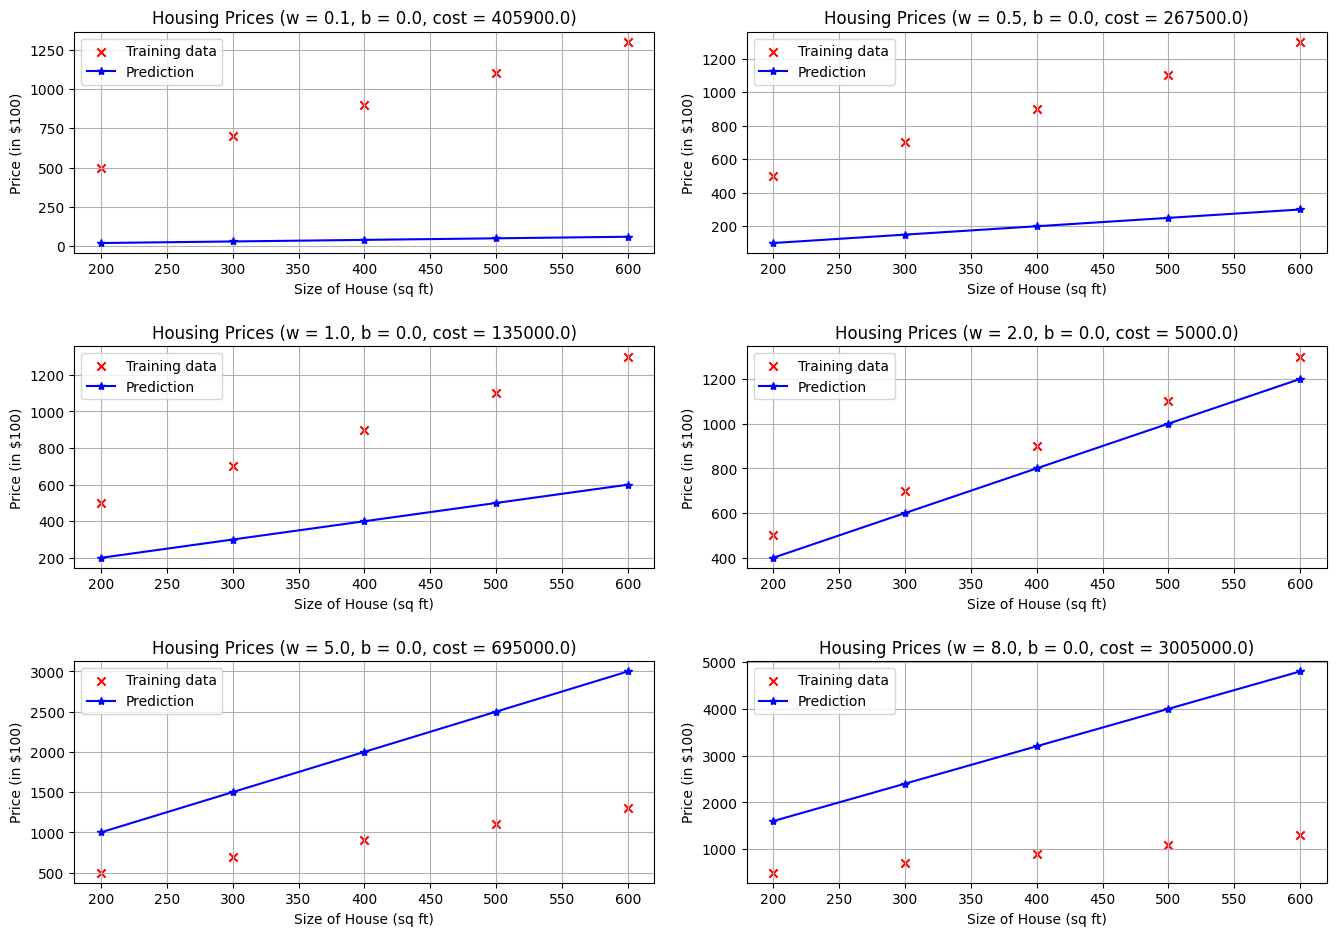

In [98]:
w = [0.1, 0.5, 1.0, 2.0, 5.0, 8.0]
b = 0.0

# Number of subplots
num_plots = len(w)
rows = (num_plots + 1) // 2  # Calculate the number of rows needed
cols = 2  # Two plots per row

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(14, 10))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Plot each prediction in a separate subplot
for i in range(num_plots):
    pred = predict(w[i], b, house_sizes)
    cost = calculate_cost(w[i], b, house_sizes, house_prices)
    print(f"Cost for w = {w[i]}, b = {b}: {pred} - {cost}")
    axes[i].scatter(house_sizes, house_prices, marker='x', color='red', label='Training data')
    axes[i].plot(house_sizes, pred, marker='*', color='blue', label='Prediction')
    axes[i].set_title(f"Housing Prices (w = {w[i]}, b = {b}, cost = {cost})")
    axes[i].set_xlabel('Size of House (sq ft)')
    axes[i].set_ylabel('Price (1000s of dollars)')
    axes[i].grid(True)
    axes[i].legend()
    # Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3.0, h_pad=2.0, w_pad=2.0)
plt.show()


In [89]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

#calculate_gradient to find best value of

def calculate_gradient(w, b, x, y):
  m = x.shape[0]
  dw_t = 0.0
  db_t = 0.0

  for i in range(m):
    f_wb = w * x[i] + b
    dw = (f_wb - y[i]) * x[i]
    db = f_wb - y[i]
    dw_t += dw
    db_t += db
  return dw_t / m, db_t / m


# calculate_gradient_decent

def gradient_descent(x, y, w_init, b_init, alpha, num_iters):
  w = w_init
  b = b_init
  J_history = []
  p_history = []

  for i in range(num_iters):
    dw, db = calculate_gradient(w, b, x, y)
    w -= alpha * dw
    b -= alpha * db
  # Save cost J at each iteration
    if i<100000:      # prevent resource exhaustion
        J_history.append(compute_cost(x, y, w, b))
        p_history.append([w,b])
    # Print cost every at intervals 10 times or as many iterations if < 10
    if i% math.ceil(num_iters/10) == 0:
        print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
              f"dj_dw: {dw: 0.3e}, dj_db: {db: 0.3e}  ",
              f"w: {w: 0.3e}, b:{b: 0.5e}")

  return w, b, J_history, p_history #return w and J,w history for graphing


Iteration    0: Cost 4.90e-01  dj_dw: -9.979e-01, dj_db: -9.516e-17   w:  9.979e-03, b: 9.51620e-19
Iteration 1000: Cost 2.15e-03  dj_dw: -4.308e-05, dj_db:  3.469e-17   w:  9.978e-01, b: 1.10893e-16
Iteration 2000: Cost 2.15e-03  dj_dw: -1.860e-09, dj_db: -2.875e-17   w:  9.979e-01, b: 1.10973e-16
Iteration 3000: Cost 2.15e-03  dj_dw: -8.043e-14, dj_db: -2.875e-17   w:  9.979e-01, b: 1.11052e-16
Iteration 4000: Cost 2.15e-03  dj_dw: -5.515e-15, dj_db: -2.875e-17   w:  9.979e-01, b: 1.11131e-16
Iteration 5000: Cost 2.15e-03  dj_dw: -5.515e-15, dj_db: -2.875e-17   w:  9.979e-01, b: 1.11211e-16
Iteration 6000: Cost 2.15e-03  dj_dw: -5.515e-15, dj_db: -2.875e-17   w:  9.979e-01, b: 1.11290e-16
Iteration 7000: Cost 2.15e-03  dj_dw: -5.515e-15, dj_db:  3.469e-17   w:  9.979e-01, b: 1.10735e-16
Iteration 8000: Cost 2.15e-03  dj_dw: -5.515e-15, dj_db:  3.469e-17   w:  9.979e-01, b: 1.10814e-16
Iteration 9000: Cost 2.15e-03  dj_dw: -5.515e-15, dj_db:  3.469e-17   w:  9.979e-01, b: 1.10893e-16


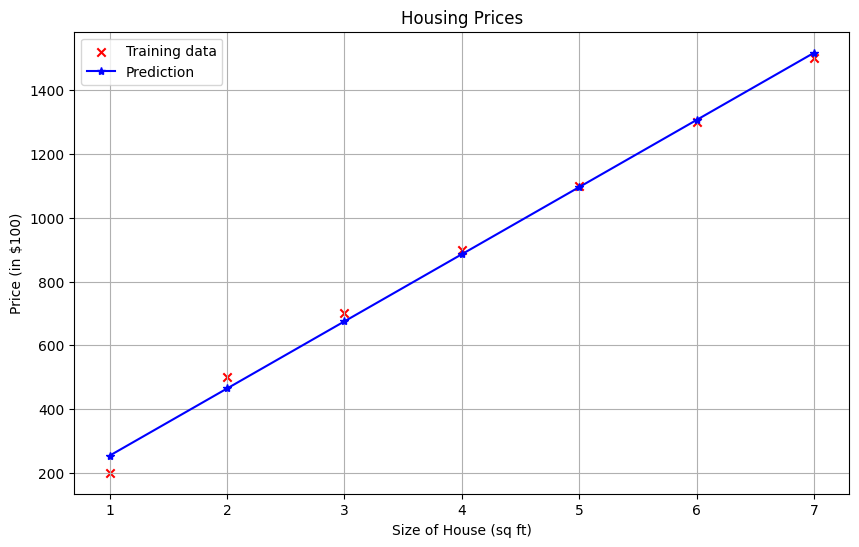

In [91]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w, b, J_hist, p_hist = gradient_descent(x_train_normalized ,y_train_normalized, w_init, b_init, tmp_alpha, iterations)

print(w_final)
# Scale back the parameters to original scale
w_final = w * (y_std / x_std)
b_final = y_mean - w_final * x_mean

print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, marker='x', color='red', label='Training data')
plt.plot(x_train, predict(w_final, b_final, x_train), marker='*', color='blue', label='Prediction')
plt.title("Housing Prices")
plt.xlabel('Size of House (sq ft)')
plt.ylabel('Price (in $100)')
plt.grid(True)
plt.legend()
plt.show()

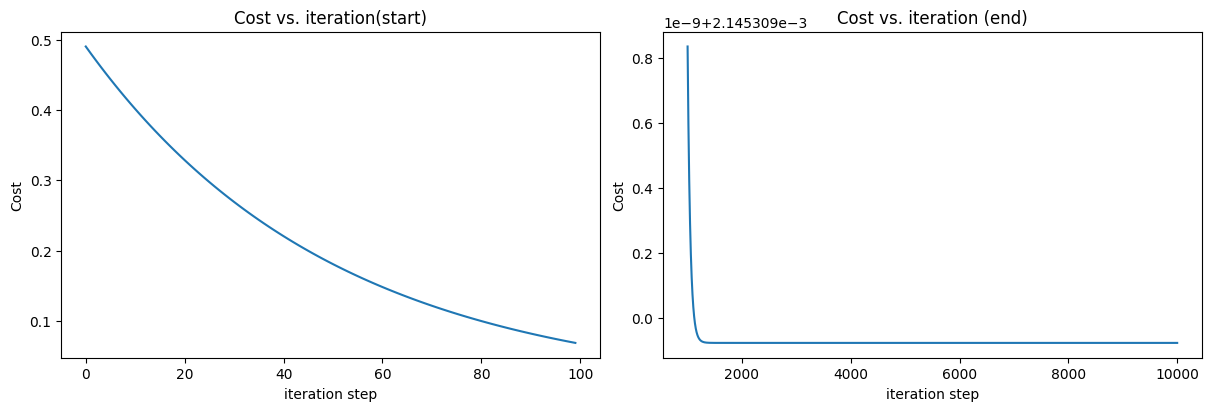

In [92]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()

In [93]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f}  dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 253.6  dollars
1200 sqft house prediction 295.7 Thousand dollars
2000 sqft house prediction 464.3 Thousand dollars
